<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Analyzing IMDb Data

_Authors: Kevin Markham (DC), Jeff Hale (DC)_

---

### Let's explore movie ratings from IMDB.

For these exercises you will be conducting basic exploratory data analysis on IMDB's movie data, looking to answer such questions as:

What is the average rating per genre?
How many different actors are in a movie?

This process will help you practice your data analysis skills while becoming more comfortable with pandas. Complete all the Basic and Intermediate level questions and then go as far as you like to develop your skills!

## Basic level

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Read in 'imdb_1000.csv' and store it in a DataFrame named movies.

In [2]:
movies = pd.read_csv('./data/imdb_1000.csv')
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


#### Check the number of rows and columns.

In [3]:
movies.shape

(979, 6)

#### Check the data type of each column.

In [4]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 979 entries, 0 to 978
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   star_rating     979 non-null    float64
 1   title           979 non-null    object 
 2   content_rating  976 non-null    object 
 3   genre           979 non-null    object 
 4   duration        979 non-null    int64  
 5   actors_list     979 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 46.0+ KB


#### Calculate the average movie duration.

In [5]:
movies['duration'].mean()

120.97957099080695

#### Sort the DataFrame by duration to find the shortest and longest movies.

In [6]:
movies.sort_values(by = 'duration', inplace = True)
movies[['title','duration']]

,title,duration
389,Freaks,64
338,Battleship Potemkin,66
258,The Cabinet of Dr. Caligari,67
293,Duck Soup,68
88,The Kid,68
...,...,...
445,The Ten Commandments,220
142,Lagaan: Once Upon a Time in India,224
78,Once Upon a Time in America,229
157,Gone with the Wind,238


In [7]:
movies.loc[movies['duration'] == movies['duration'].min(), 'title']

389    Freaks
Name: title, dtype: object

In [8]:
movies.loc[movies['duration'] == movies['duration'].max(), 'title']

476    Hamlet
Name: title, dtype: object

#### Use a box plot to display that same data.

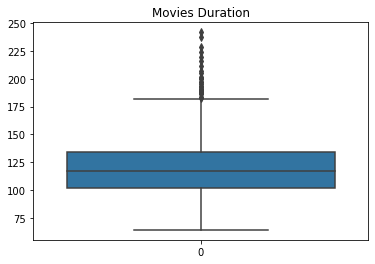

In [9]:
movies_duration = sns.boxplot(data = movies['duration'])
movies_duration.set_title('Movies Duration');

#### Count how many movies have each of the content ratings.

In [10]:
movies['content_rating'].unique()

array(['UNRATED', 'PASSED', 'NOT RATED', 'R', 'G', 'PG', 'APPROVED',
       'PG-13', 'X', 'NC-17', 'GP', nan, 'TV-MA'], dtype=object)

In [11]:
movies['content_rating'].isna().sum()

3

In [12]:
movies.loc[movies['content_rating'].isna()]

,star_rating,title,content_rating,genre,duration,actors_list
187,8.2,Butch Cassidy and the Sundance Kid,NaN,Biography,110,"[u'Paul Newman', u'Robert Redford', u'Katharin..."
936,7.4,True Grit,NaN,Adventure,128,"[u'John Wayne', u'Kim Darby', u'Glen Campbell']"
649,7.7,Where Eagles Dare,NaN,Action,158,"[u'Richard Burton', u'Clint Eastwood', u'Mary ..."


In [13]:
movies['content_rating'].fillna('UNRATED', inplace = True)

In [14]:
movies['content_rating'].isna().sum()

0

In [15]:
movies['content_rating'].replace('NOT RATED', 'UNRATED', inplace = True)

In [16]:
movies['content_rating'].value_counts()

R           460
PG-13       189
PG          123
UNRATED     106
APPROVED     47
G            32
PASSED        7
NC-17         7
X             4
GP            3
TV-MA         1
Name: content_rating, dtype: int64

## Intermediate level

#### Use a visualization to display that same data, including a title and x and y labels.

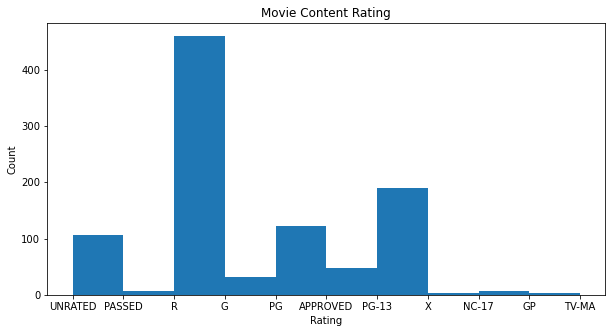

In [17]:
plt.figure(figsize = (10,5))
plt.hist(movies['content_rating'])
plt.title('Movie Content Rating')
plt.xlabel('Rating')
plt.ylabel('Count');

#### Convert the following content ratings to "UNRATED": NOT RATED, APPROVED, PASSED, GP.

In [18]:
movies['content_rating'].replace(['APPROVED','PASSED'], 'UNRATED', inplace = True)

#### Convert the following content ratings to "NC-17": X, TV-MA.

In [19]:
movies['content_rating'].replace(['X','TV-MA'], 'NC-17', inplace = True)

In [20]:
movies['content_rating'].value_counts()

R          460
PG-13      189
UNRATED    160
PG         123
G           32
NC-17       12
GP           3
Name: content_rating, dtype: int64

#### Count the number of missing values in each column.

In [21]:
for col in movies.columns:
    print (f'{col} has {movies[col].isna().sum()} missing values')

star_rating has 0 missing values
title has 0 missing values
content_rating has 0 missing values
genre has 0 missing values
duration has 0 missing values
actors_list has 0 missing values


In [22]:
movies.columns.isna().sum()

0

#### If there are missing values: examine them, then fill them in with "reasonable" values.

In [23]:
# only content_rating has missing values, already fixed

#### Calculate the average star rating for movies 2 hours or longer, and compare that with the average star rating for movies shorter than 2 hours.

In [24]:
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
389,8.0,Freaks,UNRATED,Drama,64,"[u'Wallace Ford', u'Leila Hyams', u'Olga Bacla..."
338,8.0,Battleship Potemkin,UNRATED,History,66,"[u'Aleksandr Antonov', u'Vladimir Barsky', u'G..."
258,8.1,The Cabinet of Dr. Caligari,UNRATED,Crime,67,"[u'Werner Krauss', u'Conrad Veidt', u'Friedric..."
293,8.1,Duck Soup,UNRATED,Comedy,68,"[u'Groucho Marx', u'Harpo Marx', u'Chico Marx']"
88,8.4,The Kid,UNRATED,Comedy,68,"[u'Charles Chaplin', u'Edna Purviance', u'Jack..."


In [25]:
long_movies = movies.loc[movies['duration'] >= 120]

In [26]:
long_movies['star_rating'].mean()

7.948898678414094

In [27]:
short_movies = movies.loc[movies['duration'] < 120]

In [28]:
short_movies['star_rating'].mean()

7.838666666666663

#### Use a visualization to detect whether there is a relationship between duration and star rating.

In [29]:
movies['rating_color'] = 'None'

In [30]:
movies.loc[movies['duration'] >= 120, 'rating_color'] = 'red'

In [31]:
movies.loc[movies['duration'] < 120, 'rating_color'] = 'blue'

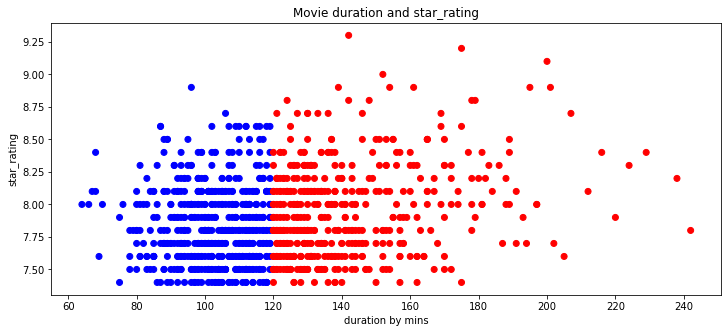

In [32]:
plt.figure(figsize = (12,5))
plt.scatter(x = movies['duration'], y = movies['star_rating'],c = movies['rating_color'])
plt.xticks(np.arange(60,250,20))
plt.title('Movie duration and star_rating')
plt.xlabel('duration by mins')
plt.ylabel('star_rating');

#### Calculate the average duration for each genre.

In [33]:
movies = movies.reset_index(drop = True)

In [34]:
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list,rating_color
0,8.0,Freaks,UNRATED,Drama,64,"[u'Wallace Ford', u'Leila Hyams', u'Olga Bacla...",blue
1,8.0,Battleship Potemkin,UNRATED,History,66,"[u'Aleksandr Antonov', u'Vladimir Barsky', u'G...",blue
2,8.1,The Cabinet of Dr. Caligari,UNRATED,Crime,67,"[u'Werner Krauss', u'Conrad Veidt', u'Friedric...",blue
3,8.1,Duck Soup,UNRATED,Comedy,68,"[u'Groucho Marx', u'Harpo Marx', u'Chico Marx']",blue
4,8.4,The Kid,UNRATED,Comedy,68,"[u'Charles Chaplin', u'Edna Purviance', u'Jack...",blue


In [35]:
movies.groupby('genre')['duration'].mean().round(2)

genre
Action       126.49
Adventure    134.84
Animation     96.60
Biography    131.84
Comedy       107.60
Crime        122.30
Drama        126.54
Family       107.50
Fantasy      112.00
Film-Noir     97.33
History       66.00
Horror       102.52
Mystery      115.62
Sci-Fi       109.00
Thriller     114.20
Western      136.67
Name: duration, dtype: float64

## Advanced level

#### Visualize the relationship between content rating and duration.

In [36]:
movies.groupby('content_rating')['duration'].mean().sort_values()

content_rating
G          112.343750
PG         115.300813
NC-17      116.250000
UNRATED    116.406250
R          122.163043
PG-13      127.195767
GP         135.666667
Name: duration, dtype: float64

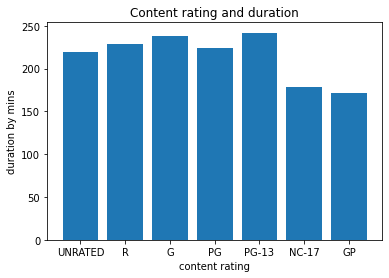

In [37]:
plt.bar(x = movies['content_rating'], height = movies['duration'])
plt.title('Content rating and duration')
plt.xlabel('content rating')
plt.ylabel('duration by mins');

#### Determine the top rated movie (by star rating) for each genre.

In [38]:
movies.groupby('genre')[['title','star_rating']].max()

,title,star_rating
genre,,
Action,Yojimbo,9.0
Adventure,True Grit,8.9
Animation,Wreck-It Ralph,8.6
Biography,Walk the Line,8.9
Comedy,Zombieland,8.6
Crime,Zodiac,9.3
Drama,Zulu,8.9
Family,Willy Wonka & the Chocolate Factory,7.9
Fantasy,The City of Lost Children,7.7


#### Check if there are multiple movies with the same title, and if so, determine if they are actually duplicates.

In [39]:
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list,rating_color
0,8.0,Freaks,UNRATED,Drama,64,"[u'Wallace Ford', u'Leila Hyams', u'Olga Bacla...",blue
1,8.0,Battleship Potemkin,UNRATED,History,66,"[u'Aleksandr Antonov', u'Vladimir Barsky', u'G...",blue
2,8.1,The Cabinet of Dr. Caligari,UNRATED,Crime,67,"[u'Werner Krauss', u'Conrad Veidt', u'Friedric...",blue
3,8.1,Duck Soup,UNRATED,Comedy,68,"[u'Groucho Marx', u'Harpo Marx', u'Chico Marx']",blue
4,8.4,The Kid,UNRATED,Comedy,68,"[u'Charles Chaplin', u'Edna Purviance', u'Jack...",blue


In [40]:
title_list = list(movies['title'])
duplicate_titles = [t for t in title_list if title_list.count(t) > 1]
duplicate_titles

['Dracula',
 'True Grit',
 'True Grit',
 'Dracula',
 'Les Miserables',
 'The Girl with the Dragon Tattoo',
 'The Girl with the Dragon Tattoo',
 'Les Miserables']

In [41]:
movies.set_index('title', inplace = True)

In [42]:
movies.loc[set(duplicate_titles)]

,star_rating,content_rating,genre,duration,actors_list,rating_color
title,,,,,,
Dracula,7.6,UNRATED,Horror,85,"[u'Bela Lugosi', u'Helen Chandler', u'David Ma...",blue
Dracula,7.5,R,Horror,128,"[u'Gary Oldman', u'Winona Ryder', u'Anthony Ho...",red
True Grit,7.7,PG-13,Adventure,110,"[u'Jeff Bridges', u'Matt Damon', u'Hailee Stei...",blue
True Grit,7.4,UNRATED,Adventure,128,"[u'John Wayne', u'Kim Darby', u'Glen Campbell']",red
Les Miserables,7.5,PG-13,Crime,134,"[u'Liam Neeson', u'Geoffrey Rush', u'Uma Thurm...",red
Les Miserables,7.7,PG-13,Drama,158,"[u'Hugh Jackman', u'Russell Crowe', u'Anne Hat...",red
The Girl with the Dragon Tattoo,7.8,R,Crime,152,"[u'Michael Nyqvist', u'Noomi Rapace', u'Ewa Fr...",red
The Girl with the Dragon Tattoo,7.9,R,Crime,158,"[u'Daniel Craig', u'Rooney Mara', u'Christophe...",red


#### Calculate the average star rating for each genre, but only include genres with at least 10 movies


In [43]:
movies.groupby('genre')['star_rating'].mean()[movies['genre'].value_counts() >= 10]

genre
Action       7.884559
Adventure    7.933333
Animation    7.914516
Biography    7.862338
Comedy       7.822436
Crime        7.916935
Drama        7.902518
Horror       7.806897
Mystery      7.975000
Name: star_rating, dtype: float64

## Bonus

#### Find something interesting using the actors data! Share your findings.

In [44]:
movies = movies.reset_index()
movies.head()

,title,star_rating,content_rating,genre,duration,actors_list,rating_color
0,Freaks,8.0,UNRATED,Drama,64,"[u'Wallace Ford', u'Leila Hyams', u'Olga Bacla...",blue
1,Battleship Potemkin,8.0,UNRATED,History,66,"[u'Aleksandr Antonov', u'Vladimir Barsky', u'G...",blue
2,The Cabinet of Dr. Caligari,8.1,UNRATED,Crime,67,"[u'Werner Krauss', u'Conrad Veidt', u'Friedric...",blue
3,Duck Soup,8.1,UNRATED,Comedy,68,"[u'Groucho Marx', u'Harpo Marx', u'Chico Marx']",blue
4,The Kid,8.4,UNRATED,Comedy,68,"[u'Charles Chaplin', u'Edna Purviance', u'Jack...",blue


In [45]:
# for n in range(movies['actors_list'].shape[0]):
#     actors = []
#     for words in movies['actors_list'][n].split(','):
#         words = words.strip().strip("[u']")
#         actors.append(words)
        
# movies.head()

In [46]:
movies['actors_list']

0      [u'Wallace Ford', u'Leila Hyams', u'Olga Bacla...
1      [u'Aleksandr Antonov', u'Vladimir Barsky', u'G...
2      [u'Werner Krauss', u'Conrad Veidt', u'Friedric...
3        [u'Groucho Marx', u'Harpo Marx', u'Chico Marx']
4      [u'Charles Chaplin', u'Edna Purviance', u'Jack...
                             ...                        
974    [u'Charlton Heston', u'Yul Brynner', u'Anne Ba...
975    [u'Aamir Khan', u'Gracy Singh', u'Rachel Shell...
976    [u'Robert De Niro', u'James Woods', u'Elizabet...
977    [u'Clark Gable', u'Vivien Leigh', u'Thomas Mit...
978    [u'Kenneth Branagh', u'Julie Christie', u'Dere...
Name: actors_list, Length: 979, dtype: object

In [47]:
movies['actors_list'].replace(['\[', 'u\'','\'\]'],'',regex=True, inplace=True)
movies['actors_list']

0            Wallace Ford', Leila Hyams', Olga Baclanova
1      Aleksandr Antonov', Vladimir Barsky', Grigori ...
2         Werner Krauss', Conrad Veidt', Friedrich Feher
3                 Groucho Marx', Harpo Marx', Chico Marx
4       Charles Chaplin', Edna Purviance', Jackie Coogan
                             ...                        
974          Charlton Heston', Yul Brynner', Anne Baxter
975            Aamir Khan', Gracy Singh', Rachel Shelley
976    Robert De Niro', James Woods', Elizabeth McGovern
977         Clark Gable', Vivien Leigh', Thomas Mitchell
978      Kenneth Branagh', Julie Christie', Derek Jacobi
Name: actors_list, Length: 979, dtype: object

In [48]:
movies.actors_list.replace('\',', ',', regex=True, inplace=True)
movies.head()

,title,star_rating,content_rating,genre,duration,actors_list,rating_color
0,Freaks,8.0,UNRATED,Drama,64,"Wallace Ford, Leila Hyams, Olga Baclanova",blue
1,Battleship Potemkin,8.0,UNRATED,History,66,"Aleksandr Antonov, Vladimir Barsky, Grigori Al...",blue
2,The Cabinet of Dr. Caligari,8.1,UNRATED,Crime,67,"Werner Krauss, Conrad Veidt, Friedrich Feher",blue
3,Duck Soup,8.1,UNRATED,Comedy,68,"Groucho Marx, Harpo Marx, Chico Marx",blue
4,The Kid,8.4,UNRATED,Comedy,68,"Charles Chaplin, Edna Purviance, Jackie Coogan",blue
